In [1]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt
import matplotlib.axes as axs
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

### Data Preparation

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

# Importing Scaler
scaler = pickle.load(open('scaler.pickle', 'rb'))
# Importing PCA
pca = pickle.load(open('pca.pickle', 'rb'))
# Importing K-Means
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))
# Standardization
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)
# Applying PCA
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)
# Data segmentation
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

df_purchase_predictors = df_purchase.copy()
# Adding segment labels
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca
segment_dummies = pd.get_dummies(purchase_segm_kmeans_pca, prefix = 'Segment', prefix_sep = '_')
df_purchase_predictors = pd.concat([df_purchase_predictors, segment_dummies], axis = 1)

df_pa = df_purchase_predictors

### Purchase Probability Model

In [3]:
# Dependant variable
Y = df_pa['Incidence'] 

In [4]:
# Our dependant variable is based on the average price of chocolate candy bars. 
# X is a data frame - the mean across the five prices.
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] +
                   df_pa['Price_2'] +
                   df_pa['Price_3'] +
                   df_pa['Price_4'] +
                   df_pa['Price_5'] ) / 5

In [5]:
# Logistic Regression model. Fitting the model with X (price) and Y (incidence).
model_purchase = LogisticRegression(solver = 'sag')
model_purchase.fit(X, Y)

LogisticRegression(solver='sag')

In [6]:
# The coefficients for price. 
model_purchase.coef_

array([[-2.34787252]])

### Price Elasticity of Purchase Probability

In [7]:
# Here we see the prices for the five different brands, which is an important factor in determining purchase probability. 
# It informs the price range, for which we will be exploring purchase probability.
df_pa[['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']].describe()

,Price_1,Price_2,Price_3,Price_4,Price_5
count,58693.000000,58693.000000,58693.000000,58693.000000,58693.000000
mean,1.392074,1.780999,2.006789,2.159945,2.654798
std,0.091139,0.170868,0.046867,0.089825,0.098272
min,1.100000,1.260000,1.870000,1.760000,2.110000
25%,1.340000,1.580000,1.970000,2.120000,2.630000
50%,1.390000,1.880000,2.010000,2.170000,2.670000
75%,1.470000,1.890000,2.060000,2.240000,2.700000
max,1.590000,1.900000,2.140000,2.260000,2.800000


In [8]:
# We introduce the price range for which we'll examine the purchase probability.
# We choose a price range between 0.5 and 3.49
price_range = np.arange(0.5, 3.5, 0.01)
price_range

array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.  , 1.01, 1.02, 1.03, 1.04,
       1.05, 1.06, 1.07, 1.08, 1.09, 1.1 , 1.11, 1.12, 1.13, 1.14, 1.15,
       1.16, 1.17, 1.18, 1.19, 1.2 , 1.21, 1.22, 1.23, 1.24, 1.25, 1.26,
       1.27, 1.28, 1.29, 1.3 , 1.31, 1.32, 1.33, 1.34, 1.35, 1.36, 1.37,
       1.38, 1.39, 1.4 , 1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.48,
       1.49, 1.5 , 1.51, 1.52, 1.53, 1.54, 1.55, 1.56, 1.57, 1.58, 1.59,
       1.6 , 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7 ,
       1.71, 1.72, 1.73, 1.74, 1.75, 1.76, 1.77, 1.78, 1.79, 1.8 , 1.81,
       1.82, 1.83, 1.84, 1.85, 1.86, 1.87, 1.88, 1.89, 1.9 , 1.91, 1.92,
       1.93, 1.94, 1.95, 1.96, 1.97, 1.98, 1.99, 2.

In [9]:
df_price_range = pd.DataFrame(price_range)

In [10]:
#The first column shows the probability for not purchasing the product, the second the probability for purchase for each price point in our price range.
Y_pr = model_purchase.predict_proba(df_price_range)
Y_pr

array([[0.08210304, 0.91789696],
       [0.0838899 , 0.9161101 ],
       [0.08571201, 0.91428799],
       [0.08756992, 0.91243008],
       [0.08946416, 0.91053584],
       [0.09139527, 0.90860473],
       [0.09336379, 0.90663621],
       [0.09537025, 0.90462975],
       [0.09741521, 0.90258479],
       [0.09949919, 0.90050081],
       [0.10162273, 0.89837727],
       [0.10378637, 0.89621363],
       [0.10599065, 0.89400935],
       [0.10823608, 0.89176392],
       [0.1105232 , 0.8894768 ],
       [0.11285254, 0.88714746],
       [0.11522461, 0.88477539],
       [0.11763992, 0.88236008],
       [0.120099  , 0.879901  ],
       [0.12260233, 0.87739767],
       [0.12515042, 0.87484958],
       [0.12774376, 0.87225624],
       [0.13038283, 0.86961717],
       [0.1330681 , 0.8669319 ],
       [0.13580004, 0.86419996],
       [0.1385791 , 0.8614209 ],
       [0.14140573, 0.85859427],
       [0.14428035, 0.85571965],
       [0.1472034 , 0.8527966 ],
       [0.15017527, 0.84982473],
       [0.

In [11]:
purchase_pr = Y_pr[:][:, 1]

In [12]:
pe = model_purchase.coef_[:, 0] * price_range * (1 - purchase_pr)

In [13]:
pe

array([-0.09638374, -0.10045102, -0.10464526, -0.10896959, -0.11342724,
       -0.11802144, -0.12275551, -0.1276328 , -0.13265673, -0.13783073,
       -0.14315833, -0.14864308, -0.15428857, -0.16009845, -0.16607641,
       -0.17222619, -0.17855158, -0.18505637, -0.19174445, -0.1986197 ,
       -0.20568606, -0.2129475 , -0.22040803, -0.22807166, -0.23594247,
       -0.24402455, -0.25232199, -0.26083894, -0.26957955, -0.27854799,
       -0.28774842, -0.29718505, -0.30686206, -0.31678366, -0.32695404,
       -0.33737739, -0.3480579 , -0.35899975, -0.37020709, -0.38168406,
       -0.39343477, -0.4054633 , -0.41777372, -0.43037002, -0.44325619,
       -0.45643614, -0.46991375, -0.48369283, -0.49777713, -0.51217033,
       -0.52687605, -0.54189781, -0.55723906, -0.57290315, -0.58889337,
       -0.60521285, -0.62186467, -0.63885177, -0.65617697, -0.67384299,
       -0.69185239, -0.71020763, -0.72891101, -0.7479647 , -0.7673707 ,
       -0.78713087, -0.80724691, -0.82772036, -0.84855257, -0.86

In [14]:
df_price_elasticities = pd.DataFrame(price_range)

In [15]:
df_price_elasticities = df_price_elasticities.rename(columns = {0: "Price_Point"})
df_price_elasticities['Mean_PE'] = pe
df_price_elasticities

,Price_Point,Mean_PE
0,0.50,-0.096384
1,0.51,-0.100451
2,0.52,-0.104645
3,0.53,-0.108970
4,0.54,-0.113427
...,...,...
295,3.45,-8.012224
296,3.46,-8.037473
297,3.47,-8.062687
298,3.48,-8.087867


In [119]:
# pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056,0.332011,-0.001042,0.172739,-0.039243,0.196459,-0.115831,0.174113,-0.298429,0.482873,-0.102157,-0.099543
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617,0.337287,-0.001104,0.175009,-0.040245,0.198955,-0.118870,0.176169,-0.304488,0.492185,-0.104413,-0.101736
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207,0.342507,-0.001170,0.177235,-0.041256,0.201398,-0.121944,0.178173,-0.310556,0.501481,-0.106679,-0.103939
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827,0.347668,-0.001239,0.179417,-0.042278,0.203790,-0.125053,0.180127,-0.316635,0.510762,-0.108954,-0.106150
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477,0.352773,-0.001311,0.181555,-0.043309,0.206130,-0.128197,0.182030,-0.322724,0.520026,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012224,-12.415168,-5.724497,-5.052504,-4.161902,-4.861432,-4.983042,-3.231573,0.162234,-3.746045,0.028578,-1.319097,0.068696,-3.592457,0.024052,-3.331946,0.153524,-1.774292,-1.664290
296,3.46,-8.037473,-12.451737,-5.744742,-5.069359,-4.177231,-4.879634,-4.999947,-3.247767,0.160333,-3.757487,0.028048,-1.329301,0.068082,-3.606361,0.023696,-3.345274,0.148213,-1.788634,-1.677205
297,3.47,-8.062687,-12.488289,-5.764950,-5.086196,-4.192542,-4.897804,-5.016833,-3.263929,0.158448,-3.768908,0.027525,-1.339561,0.067472,-3.620221,0.023344,-3.358601,0.143065,-1.803124,-1.690246
298,3.48,-8.087867,-12.524825,-5.785122,-5.103014,-4.207836,-4.915945,-5.033699,-3.280058,0.156576,-3.780310,0.027010,-1.349878,0.066867,-3.634038,0.022997,-3.371924,0.138076,-1.817766,-1.703414


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

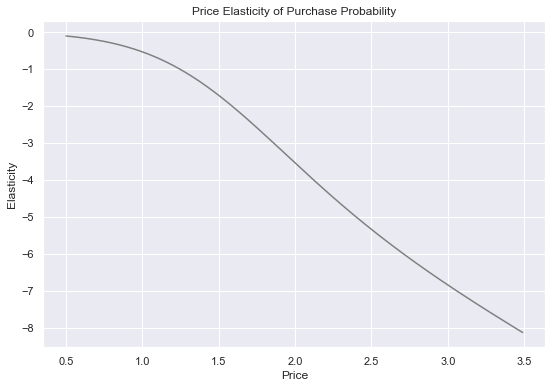

In [17]:
# Displaying the price elasticity of purchase probability of the average customer.
# We observe that the price elasticities are all negative. Furthermore we can spot where the customer becomes inelastic.
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### Purchase Probability by Segments

### $\color{red}{\text{Segment 1 - Career-Focused}}$

In [18]:
# Filtering the data that contain only customers from the career-focused segment.
df_pa_segment_1 = df_pa[df_pa['Segment'] == 1]

In [19]:
Y = df_pa_segment_1['Incidence']

In [20]:
X = pd.DataFrame()

In [21]:
# Calculating the average price for purchases in segment 1. Our dependant variable contains the mean price of the brands.
X['Mean_Price'] = (df_pa_segment_1['Price_1'] + 
                   df_pa_segment_1['Price_2'] + 
                   df_pa_segment_1['Price_3'] + 
                   df_pa_segment_1['Price_4'] + 
                   df_pa_segment_1['Price_5']) / 5

In [22]:
# Fitting logistic regression model
model_incidence_segment_1 = LogisticRegression(solver = 'sag')
model_incidence_segment_1.fit(X, Y)

LogisticRegression(solver='sag')

In [23]:
# We observe that the price coefficient for the career focused is -1.7, whereas for the average customer it was -2.35.
# This is an indicator, that this segment is less price sensitive.
model_incidence_segment_1.coef_

array([[-1.72340044]])

In [24]:
# Calculating Price Elasticity of the career-focused segment.
Y_segment_1 = model_incidence_segment_1.predict_proba(df_price_range)
purchase_pr_segment_1 = Y_segment_1[:][:, 1]
pe_segment_1 = model_incidence_segment_1.coef_[:, 0] * price_range * (1 - purchase_pr_segment_1)

### Results

In [25]:
df_price_elasticities['PE_Segment_1'] = pe_segment_1
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1
0,0.50,-0.096384,-0.119044
1,0.51,-0.100451,-0.123239
2,0.52,-0.104645,-0.127529
3,0.53,-0.108970,-0.131915
4,0.54,-0.113427,-0.136398
5,0.55,-0.118021,-0.140979
6,0.56,-0.122756,-0.145661
7,0.57,-0.127633,-0.150445
8,0.58,-0.132657,-0.155332
9,0.59,-0.137831,-0.160324


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

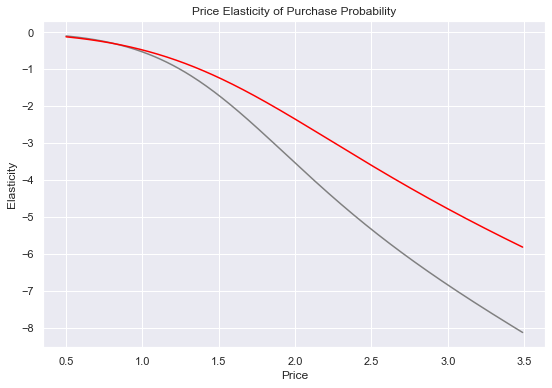

In [26]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'red')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{gold}{\text{Segment 2 - Standard}}$

In [27]:
# Selecting customers from segment 2- Standard.
df_pa_segment_2 = df_pa[df_pa['Segment'] == 2]

In [28]:
# Logistic regression model
Y = df_pa_segment_2['Incidence']

X = pd.DataFrame()
# Calculating average price for this segment
X['Mean_Price'] = (df_pa_segment_2['Price_1'] + 
                   df_pa_segment_2['Price_2'] + 
                   df_pa_segment_2['Price_3'] + 
                   df_pa_segment_2['Price_4'] + 
                   df_pa_segment_2['Price_5']) / 5

model_incidence_segment2 = LogisticRegression(solver = 'sag')
model_incidence_segment2.fit(X, Y)




LogisticRegression(solver='sag')

In [29]:
# Calculating price elasticities
model_incidence_segment2.coef_

array([[-1.50842863]])

In [30]:
Y_segment_2 = model_incidence_segment2.predict_proba(df_price_range)
purchase_pr_segment2 = Y_segment_2[:][: , 1]
pe_segment2 = model_incidence_segment2.coef_[:,0] * price_range * ( 1- purchase_pr_segment2)

### Results

In [31]:
df_price_elasticities['PE_Segment_2'] = pe_segment2
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_1,PE_Segment_2
0,0.50,-0.096384,-0.119044,-0.211356
1,0.51,-0.100451,-0.123239,-0.217931
2,0.52,-0.104645,-0.127529,-0.224614
3,0.53,-0.108970,-0.131915,-0.231406
4,0.54,-0.113427,-0.136398,-0.238307
5,0.55,-0.118021,-0.140979,-0.245319
6,0.56,-0.122756,-0.145661,-0.252441
7,0.57,-0.127633,-0.150445,-0.259674
8,0.58,-0.132657,-0.155332,-0.267020
9,0.59,-0.137831,-0.160324,-0.274479


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

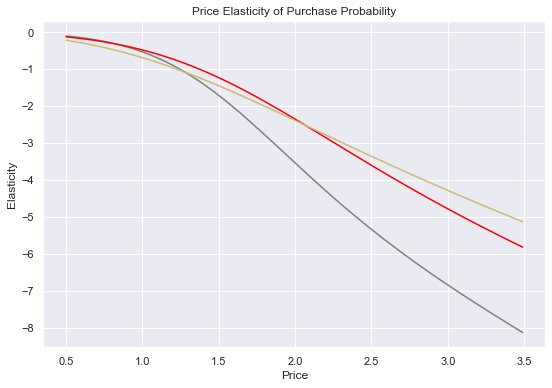

In [32]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'red')
plt.plot(price_range, pe_segment2, color = 'y')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{purple}{\text{Segment 0 - Fewer-Opportunities}}$

In [33]:
# Selecting customers from segment 0 - Fewer-Opportunities.
df_pa_segment_0 = df_pa[df_pa['Segment'] == 0]


Y = df_pa_segment_0['Incidence']
X = pd.DataFrame()

# Calculating average price for this segment
X['Mean_Price'] = (df_pa_segment_0['Price_1'] + 
                   df_pa_segment_0['Price_2'] + 
                   df_pa_segment_0['Price_3'] + 
                   df_pa_segment_0['Price_4'] + 
                   df_pa_segment_0['Price_5']) / 5
# Logistic regression model
model_incidence_segment0 = LogisticRegression(solver = 'sag')
model_incidence_segment0.fit(X, Y)


LogisticRegression(solver='sag')

In [34]:
model_incidence_segment0.coef_

array([[-3.60337018]])

In [35]:
Y_segment_0 = model_incidence_segment0.predict_proba(df_price_range)
purchase_pr_segment0 = Y_segment_0[:][: , 1]
pe_segment0 = model_incidence_segment0.coef_[:,0] * price_range *( 1- purchase_pr_segment0)
df_price_elasticities.insert(2, column = 'PE_Segment_0', value = pe_segment0)

In [36]:
df_price_elasticities['PE_Segment_0'] = pe_segment0
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307
5,0.55,-0.118021,-0.042359,-0.140979,-0.245319
6,0.56,-0.122756,-0.044676,-0.145661,-0.252441
7,0.57,-0.127633,-0.047104,-0.150445,-0.259674
8,0.58,-0.132657,-0.049647,-0.155332,-0.267020
9,0.59,-0.137831,-0.052311,-0.160324,-0.274479


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

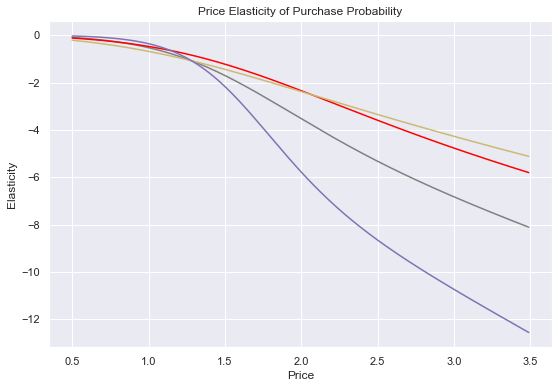

In [37]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'red')
plt.plot(price_range, pe_segment2, color = 'y')
plt.plot(price_range, pe_segment0, color = 'm')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### $\color{cyan}{\text{Segment 3 - Well-Off}}$

In [38]:
# Selecting customers from segment 3 - well-Off
df_pa_segment_3 = df_pa[df_pa['Segment'] == 3]

Y = df_pa_segment_3['Incidence']

X = pd.DataFrame()

X['Mean_Price'] = (df_pa_segment_3['Price_1'] + 
                   df_pa_segment_3['Price_2'] + 
                   df_pa_segment_3['Price_3'] + 
                   df_pa_segment_3['Price_4'] + 
                   df_pa_segment_3['Price_5']) / 5

model_incidence_segment3 = LogisticRegression(solver = 'sag')
model_incidence_segment3.fit(X, Y)



LogisticRegression(solver='sag')

In [39]:
model_incidence_segment3.coef_


array([[-1.28502943]])

In [40]:
Y_segment_3 = model_incidence_segment3.predict_proba(df_price_range)
purchase_pr_segment3 = Y_segment_3[:][: , 1]
pe_segment3 = model_incidence_segment3.coef_[:,0] * price_range *( 1- purchase_pr_segment3)
df_price_elasticities['PE_Segment_3'] = pe_segment3


In [41]:
df_price_elasticities['PE_Segment_3'] = pe_segment3
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332
5,0.55,-0.118021,-0.042359,-0.140979,-0.245319,-0.190547
6,0.56,-0.122756,-0.044676,-0.145661,-0.252441,-0.195838
7,0.57,-0.127633,-0.047104,-0.150445,-0.259674,-0.201205
8,0.58,-0.132657,-0.049647,-0.155332,-0.267020,-0.206648
9,0.59,-0.137831,-0.052311,-0.160324,-0.274479,-0.212169


Text(0.5, 1.0, 'Price Elasticity of Purchase Probability')

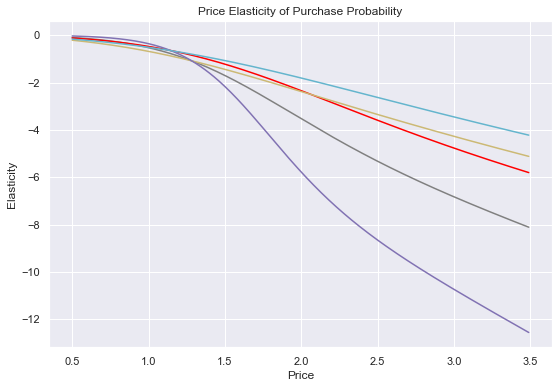

In [42]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment_1, color = 'red')
plt.plot(price_range, pe_segment2, color = 'y')
plt.plot(price_range, pe_segment0, color = 'm')
plt.plot(price_range, pe_segment3, color = 'c')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')

### ${\textbf{Results}}$

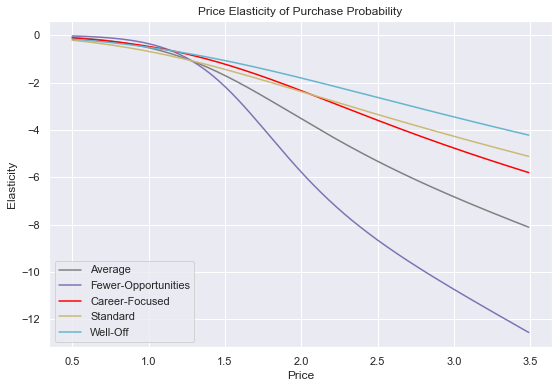

In [43]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, pe, color = 'grey')
plt.plot(price_range, pe_segment0, color = 'm')
plt.plot(price_range, pe_segment_1, color = 'red')
plt.plot(price_range, pe_segment2, color = 'y')
plt.plot(price_range, pe_segment3, color = 'c')
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability')
plt.legend(['Average','Fewer-Opportunities','Career-Focused',
            'Standard','Well-Off'])

### Purchase Probability with Promotion Feature

#### Data Preparation

In [44]:
Y = df_pa['Incidence']

In [45]:
X = pd.DataFrame()
X['Mean_Price'] = (df_pa['Price_1'] + 
                   df_pa['Price_2'] + 
                   df_pa['Price_3'] + 
                   df_pa['Price_4'] + 
                   df_pa['Price_5']) / 5

In [46]:
# Including a second promotion feature. 
X['Mean_Promotion'] = (df_pa['Promotion_1'] +
                       df_pa['Promotion_2'] +
                       df_pa['Promotion_3'] +
                       df_pa['Promotion_4'] +
                       df_pa['Promotion_5'] ) / 5
X.head()

,Mean_Price,Mean_Promotion
0,2.044,0.2
1,2.028,0.0
2,2.028,0.0
3,2.028,0.0
4,2.030,0.0


### Model Estimation

In [47]:
# The coefficient for promotion is positive. 
# There is a positive relationship between promotion and purchase probability.
model_incidence_promotion = LogisticRegression(solver = 'sag')
model_incidence_promotion.fit(X, Y)
model_incidence_promotion.coef_

array([[-1.49397341,  0.5614775 ]])

### Price Elasticity with Promotion

In [48]:
# Creating a data frame on which the model will predict. We need to include A price and promotion feature.
df_price_elasticity_promotion = pd.DataFrame(price_range)
df_price_elasticity_promotion = df_price_elasticity_promotion.rename(columns = {0: "Price_Range"})
df_price_elasticity_promotion

,Price_Range
0,0.50
1,0.51
2,0.52
3,0.53
4,0.54
5,0.55
6,0.56
7,0.57
8,0.58
9,0.59


In [49]:
# Calculating price elasticities of purchase probability, we assume there is a promotion across at each price points.
df_price_elasticity_promotion['Promotion'] = 1


In [50]:
# Purchase Probability with Promotion Model Prediction
Y_promotion = model_incidence_promotion.predict_proba(df_price_elasticity_promotion)

In [51]:
promo = Y_promotion[:, 1]
price_elasticity_promo = (model_incidence_promotion.coef_[:, 0] * price_range) * (1 - promo)

In [52]:
# Updating master data to include elasticities of purchase probability with promotion feature
df_price_elasticities['Elasticity_Promotion_1'] = price_elasticity_promo
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679
5,0.55,-0.118021,-0.042359,-0.140979,-0.245319,-0.190547,-0.147117
6,0.56,-0.122756,-0.044676,-0.145661,-0.252441,-0.195838,-0.151638
7,0.57,-0.127633,-0.047104,-0.150445,-0.259674,-0.201205,-0.156243
8,0.58,-0.132657,-0.049647,-0.155332,-0.267020,-0.206648,-0.160933
9,0.59,-0.137831,-0.052311,-0.160324,-0.274479,-0.212169,-0.165708


### Price Elasticity without Promotion

In [53]:
df_price_elasticity_promotion_no = pd.DataFrame(price_range)
df_price_elasticity_promotion_no = df_price_elasticity_promotion_no.rename(columns = {0: "Price_Range"})

In [54]:
# Promotion feature -No Promotion.
# Assuming there aren't any promotional activities on any of the price points.
df_price_elasticity_promotion_no['Promotion'] = 0

In [55]:
#Purchase Probability without Promotion Model Prediction
Y_no_promo = model_incidence_promotion.predict_proba(df_price_elasticity_promotion_no)

In [56]:
no_promo = Y_no_promo[: , 1]

In [57]:
price_elasticity_no_promo = model_incidence_promotion.coef_[:, 0] * price_range *(1- no_promo)

In [58]:
# Updating master data frame to include purchase probability elasticities without promotion.
df_price_elasticities['Elasticity_Promotion_0'] = price_elasticity_no_promo

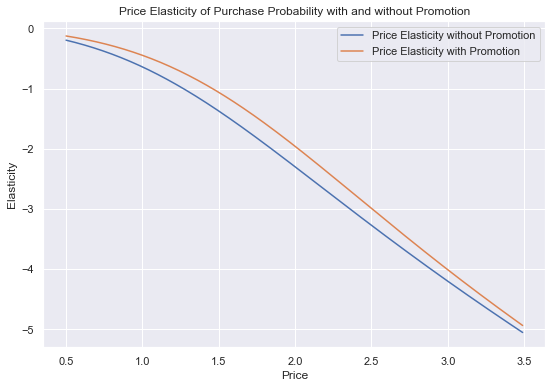

In [59]:
# Here we observe that the purchase probability elasticity of the customer is less elastic when there is promotion.

plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_no_promo)
plt.plot(price_range, price_elasticity_promo)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Probability with and without Promotion')
plt.legend(['Price Elasticity without Promotion','Price Elasticity with Promotion'])

## ${\textbf{Brand Choice}}$

### Data Preparation

In [60]:
# Here we are interested in determining the brand choice of the customer. 
# Filtering the data, to include only purchase occasion, when a purchase has occured. 
brand_choice = df_pa[df_pa['Incidence'] == 1]

In [120]:
pd.options.display.max_rows = 100
brand_choice

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58621,200000500,296,1,2,6,0,0,1.48,1.89,2.01,...,42,1,120946,1,0,0,1,0,0,0
58648,200000500,460,1,1,12,0,0,1.35,1.57,2.02,...,42,1,120946,1,0,0,1,0,0,0
58674,200000500,641,1,2,7,0,0,1.50,1.85,2.06,...,42,1,120946,1,0,0,1,0,0,0
58687,200000500,697,1,2,6,0,0,1.42,1.51,1.97,...,42,1,120946,1,0,0,1,0,0,0


In [62]:
# The model will predict the brand.
Y = brand_choice['Brand']

In [63]:
# Deciding which features to include for prediction.
brand_choice.columns.values

array(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3'], dtype=object)

In [64]:
# Prediction based on the prices for the five brands.
features = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
X = brand_choice[features]

In [65]:
# Brand Choice Model fit.
model_brand_choice = LogisticRegression(solver = 'sag', multi_class = 'multinomial')
model_brand_choice.fit(X, Y)

LogisticRegression(multi_class='multinomial', solver='sag')

In [66]:
model_brand_choice.coef_

array([[-3.91596409,  0.65845543,  2.41768383,  0.70407874, -0.20212047],
       [ 1.2746108 , -1.87985602, -0.2126495 , -0.20634188,  0.58786949],
       [ 1.62419956,  0.56211666,  0.50093417,  1.0395168 ,  0.45280355],
       [ 0.57453559,  0.39558663, -1.40061291, -1.2462451 ,  0.24934848],
       [ 0.44261814,  0.26369731, -1.30535559, -0.29100855, -1.08790105]])

In [67]:
# Creating pandas data frame, which contains the coefficients.
bc_coef = pd.DataFrame(model_brand_choice.coef_)
bc_coef

,0,1,2,3,4
0,-3.915964,0.658455,2.417684,0.704079,-0.202120
1,1.274611,-1.879856,-0.212649,-0.206342,0.587869
2,1.624200,0.562117,0.500934,1.039517,0.452804
3,0.574536,0.395587,-1.400613,-1.246245,0.249348
4,0.442618,0.263697,-1.305356,-0.291009,-1.087901


In [68]:
bc_coef = pd.DataFrame(np.transpose(model_brand_choice.coef_))
coefficients = ['Coef_Brand_1', 'Coef_Brand_2', 'Coef_Brand_3', 'Coef_Brand_4', 'Coef_Brand_5']
bc_coef.columns = [coefficients]
prices = ['Price_1', 'Price_2', 'Price_3', 'Price_4', 'Price_5']
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-3.92,1.27,1.62,0.57,0.44
Price_2,0.66,-1.88,0.56,0.40,0.26
Price_3,2.42,-0.21,0.50,-1.40,-1.31
Price_4,0.70,-0.21,1.04,-1.25,-0.29
Price_5,-0.20,0.59,0.45,0.25,-1.09


### Own Price Elasticity Brand 5

In [69]:
# Creating a data frame with price columns, which the model will use to predict the brand choice probabilities.
df_own_brand_5 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5['Price_1'] = brand_choice['Price_1'].mean()
df_own_brand_5['Price_2'] = brand_choice['Price_2'].mean()
df_own_brand_5['Price_3'] = brand_choice['Price_3'].mean()
df_own_brand_5['Price_4'] = brand_choice['Price_4'].mean()
df_own_brand_5['Price_5'] = price_range
df_own_brand_5

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,2.159658,0.50
1,1.384559,1.764717,2.006694,2.159658,0.51
2,1.384559,1.764717,2.006694,2.159658,0.52
3,1.384559,1.764717,2.006694,2.159658,0.53
4,1.384559,1.764717,2.006694,2.159658,0.54
5,1.384559,1.764717,2.006694,2.159658,0.55
6,1.384559,1.764717,2.006694,2.159658,0.56
7,1.384559,1.764717,2.006694,2.159658,0.57
8,1.384559,1.764717,2.006694,2.159658,0.58
9,1.384559,1.764717,2.006694,2.159658,0.59


In [70]:
# Brand Choice Model prediction.
predict_brand_5 = model_brand_choice.predict_proba(df_own_brand_5)

In [71]:
pr_own_brand_5 = predict_brand_5[: ][:, 4]

In [72]:
beta5 = bc_coef.iloc[4, 4]
beta5

-1.09

In [73]:
# Calculating price elasticities for brand choice without promotion. 
own_price_elasticity_brand_5 = beta5 * price_range * (1 - pr_own_brand_5)

In [74]:
# Adding the price elasticities to our master data frame. 
df_price_elasticities['Brand_5'] = own_price_elasticity_brand_5
# pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477
5,0.55,-0.118021,-0.042359,-0.140979,-0.245319,-0.190547,-0.147117,-0.227282,-0.057159
6,0.56,-0.122756,-0.044676,-0.145661,-0.252441,-0.195838,-0.151638,-0.233924,-0.058871
7,0.57,-0.127633,-0.047104,-0.150445,-0.259674,-0.201205,-0.156243,-0.240672,-0.060615
8,0.58,-0.132657,-0.049647,-0.155332,-0.267020,-0.206648,-0.160933,-0.247528,-0.062391
9,0.59,-0.137831,-0.052311,-0.160324,-0.274479,-0.212169,-0.165708,-0.254491,-0.064200


Text(0.5, 1.0, 'Own Price Elasticity of Purchase Probability for Brand 5')

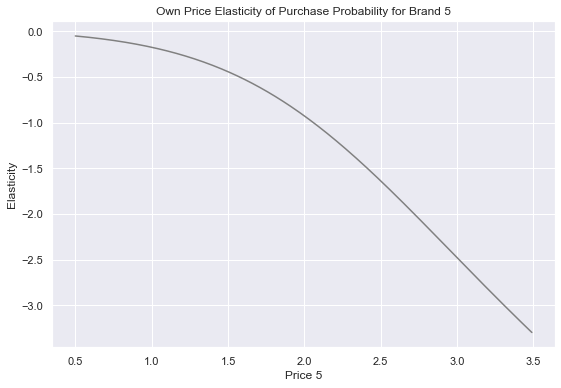

In [75]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, own_price_elasticity_brand_5, color = 'grey')
plt.xlabel('Price 5')
plt.ylabel('Elasticity')
plt.title('Own Price Elasticity of Purchase Probability for Brand 5')

### Cross Price Elasticity Brand 5, Cross Brand 4

In [76]:
# The brand which comes closest to our own brand is brand 4. 
df_brand5_cross_brand4 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4['Price_1'] = brand_choice['Price_1'].mean()
df_brand5_cross_brand4['Price_2'] = brand_choice['Price_2'].mean()
df_brand5_cross_brand4['Price_3'] = brand_choice['Price_3'].mean()
df_brand5_cross_brand4['Price_4'] = price_range
df_brand5_cross_brand4['Price_5'] = brand_choice['Price_5'].mean()

In [77]:
df_brand5_cross_brand4.head()

,Price_1,Price_2,Price_3,Price_4,Price_5
0,1.384559,1.764717,2.006694,0.50,2.654296
1,1.384559,1.764717,2.006694,0.51,2.654296
2,1.384559,1.764717,2.006694,0.52,2.654296
3,1.384559,1.764717,2.006694,0.53,2.654296
4,1.384559,1.764717,2.006694,0.54,2.654296


In [78]:
predict_brand5_cross_brand4 = model_brand_choice.predict_proba(df_brand5_cross_brand4)

In [79]:
# As now we're interested in what the probability of choosing the competitor brand is, 
# Selecting the purchase probability for brand 4, contained in the 4th column with index 3. 
pr_brand_4 = predict_brand5_cross_brand4[:][:, 3]

In [80]:
beta5

-1.09

In [81]:
# In order to calculate the cross brand price elasticity, we need to use the new formula
brand5_cross_brand4_price_elasticity = -beta5 * price_range * pr_brand_4

In [82]:
# Updating price elasticities data frame to include the cross price elasticities for brand 5 with respect to brand 4.
df_price_elasticities['Brand_5_Cross_Brand_4'] = brand5_cross_brand4_price_elasticity
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056,0.332011
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617,0.337287
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207,0.342507
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827,0.347668
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477,0.352773
5,0.55,-0.118021,-0.042359,-0.140979,-0.245319,-0.190547,-0.147117,-0.227282,-0.057159,0.357820
6,0.56,-0.122756,-0.044676,-0.145661,-0.252441,-0.195838,-0.151638,-0.233924,-0.058871,0.362809
7,0.57,-0.127633,-0.047104,-0.150445,-0.259674,-0.201205,-0.156243,-0.240672,-0.060615,0.367740
8,0.58,-0.132657,-0.049647,-0.155332,-0.267020,-0.206648,-0.160933,-0.247528,-0.062391,0.372614
9,0.59,-0.137831,-0.052311,-0.160324,-0.274479,-0.212169,-0.165708,-0.254491,-0.064200,0.377429


Text(0.5, 1.0, 'Cross Price Elasticity of Brand 5 wrt Brand 4')

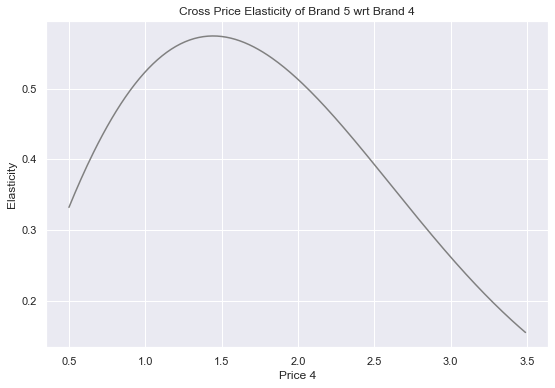

In [83]:
# Here we examine the cross price elasticity of purchase probability for brand 5 with respect to brand 4.
# We observe they are positive. As the price of the competitor brand increases, 
# so does the probability for purchasing our own brand.
# Even though the elasticity starts to decrease from the 1.45 mark, it is still positive, 
# signalling that the increase in purchase probability for the own brand happens more slowly.
plt.figure(figsize = (9, 6))
plt.plot(price_range, brand5_cross_brand4_price_elasticity, color = 'grey')
plt.xlabel('Price 4')
plt.ylabel('Elasticity')
plt.title('Cross Price Elasticity of Brand 5 wrt Brand 4')

### Own and Cross-Price Elasticity by Segment

### $\color{cyan}{\text{Well-Off}}$

In [84]:
# We are interested in analysing the purchase probability for choosing brand 5 by segments.
# Filtering the data to contain only purchase incidences of the third segment - Well-off.
brand_choice_s3 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s3 = brand_choice_s3[brand_choice_s3['Segment'] == 3]

pd.options.display.max_rows = 100
brand_choice_s3

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
101,200000002,6,1,4,1,0,0,1.59,1.87,2.01,...,52,2,159052,2,1,3,0,0,0,1
115,200000002,100,1,4,2,0,0,1.47,1.90,1.95,...,52,2,159052,2,1,3,0,0,0,1
138,200000002,283,1,4,3,0,0,1.37,1.89,2.00,...,52,2,159052,2,1,3,0,0,0,1
141,200000002,307,1,4,1,0,0,1.34,1.89,2.01,...,52,2,159052,2,1,3,0,0,0,1
153,200000002,422,1,4,1,0,0,1.34,1.89,2.02,...,52,2,159052,2,1,3,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57346,200000489,687,1,4,1,4,1,1.50,1.87,2.06,...,44,2,193816,2,1,3,0,0,0,1
57347,200000489,693,1,4,2,4,1,1.42,1.51,2.02,...,44,2,193816,2,1,3,0,0,0,1
57348,200000489,701,1,4,3,4,1,1.42,1.85,1.99,...,44,2,193816,2,1,3,0,0,0,1
57350,200000489,715,1,4,2,0,0,1.50,1.80,2.09,...,44,2,193816,2,1,3,0,0,0,1


In [85]:
# Brand Choice Model estimation.
Y = brand_choice_s3['Brand']
brand_choice_s3 = pd.get_dummies(brand_choice_s3, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s3[features]
model_brand_choice_s3 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s3.fit(X, Y)

# Coefficients table for segment 3
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s3.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)
bc_coef

,Coef_Brand_1,Coef_Brand_2,Coef_Brand_3,Coef_Brand_4,Coef_Brand_5
Price_1,-2.15,1.33,0.78,0.13,-0.10
Price_2,-0.95,-1.37,1.24,0.79,0.29
Price_3,2.00,-1.66,-0.41,-0.01,0.09
Price_4,2.52,0.95,-0.20,-1.92,-1.34
Price_5,-1.00,-0.30,1.18,0.56,-0.44


### $\color{cyan}{\text{Own-Brand Price Elasticity}}$

In [86]:
# Calculating own-brand price elasticity for brand 5 and the Well-off segment.
df_own_brand_5_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_own_brand_5_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_own_brand_5_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_own_brand_5_s3['Price_4'] = brand_choice_s3['Price_4'].mean()
df_own_brand_5_s3['Price_5'] = price_range

predict_own_brand_5_s3 = model_brand_choice_s3.predict_proba(df_own_brand_5_s3)
pr_own_brand_5_s3 = predict_own_brand_5_s3[: ][: , 4]

own_price_elasticity_brand_5_s3 =  beta5 * price_range * (1 - pr_own_brand_5_s3)
df_price_elasticities['Brand 5 S3'] = own_price_elasticity_brand_5_s3

### $\color{cyan}{\text{Cross-Brand Price Elasticity}}$

In [87]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Well-off segment.
df_brand5_cross_brand4_s3 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s3['Price_1'] = brand_choice_s3['Price_1'].mean()
df_brand5_cross_brand4_s3['Price_2'] = brand_choice_s3['Price_2'].mean()
df_brand5_cross_brand4_s3['Price_3'] = brand_choice_s3['Price_3'].mean()
df_brand5_cross_brand4_s3['Price_4'] = price_range
df_brand5_cross_brand4_s3['Price_5'] = brand_choice_s3['Price_5'].mean()

predict_brand5_cross_brand4_s3 = model_brand_choice_s3.predict_proba(df_brand5_cross_brand4_s3)
pr_cross_brand_5_s3 = predict_brand5_cross_brand4_s3[: ][: , 3]

# Updating master data frame to include the newly obtained cross-brand price elasticities.
brand5_cross_brand4_price_elasticity_s3 = -beta5 * price_range * pr_cross_brand_5_s3
df_price_elasticities['Brand_5_Cross_Brand_4_S3'] = brand5_cross_brand4_price_elasticity_s3
# pd.options.display.max_rows = None
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056,0.332011,-0.298429,0.482873
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617,0.337287,-0.304488,0.492185
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207,0.342507,-0.310556,0.501481
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827,0.347668,-0.316635,0.510762
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477,0.352773,-0.322724,0.520026
...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012224,-12.415168,-5.724497,-5.052504,-4.161902,-4.861432,-4.983042,-3.231573,0.162234,-3.331946,0.153524
296,3.46,-8.037473,-12.451737,-5.744742,-5.069359,-4.177231,-4.879634,-4.999947,-3.247767,0.160333,-3.345274,0.148213
297,3.47,-8.062687,-12.488289,-5.764950,-5.086196,-4.192542,-4.897804,-5.016833,-3.263929,0.158448,-3.358601,0.143065
298,3.48,-8.087867,-12.524825,-5.785122,-5.103014,-4.207836,-4.915945,-5.033699,-3.280058,0.156576,-3.371924,0.138076


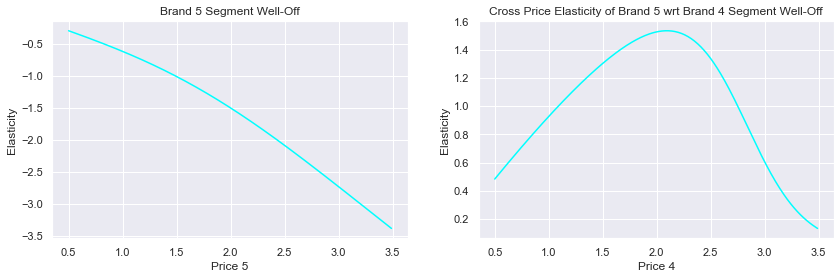

In [88]:
fig, axs = plt.subplots(1, 2, figsize = (14, 4))
axs[0].plot(price_range, own_price_elasticity_brand_5_s3, color = 'cyan')
axs[0].set_title('Brand 5 Segment Well-Off')
axs[0].set_xlabel('Price 5')

axs[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, color = 'cyan')
axs[1].set_title('Cross Price Elasticity of Brand 5 wrt Brand 4 Segment Well-Off')
axs[1].set_xlabel('Price 4')

for ax in axs.flat:
    ax.set(ylabel = 'Elasticity')

### $\color{purple}{\text{Fewer-Opportunities}}$

In [89]:
# Here we are interesting in analysing the brand choice probability of the Fewer-Opportunities segment.
# Selecting only purchases from segment 0.
brand_choice_s0 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s0 = brand_choice_s0[brand_choice_s0['Segment'] == 0]
brand_choice_s0.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0


In [90]:
# Brand Choice Model estimation.
Y = brand_choice_s0['Brand']
brand_choice_s0 = pd.get_dummies(brand_choice_s0, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s0[features]
model_brand_choice_s0 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 200)
model_brand_choice_s0.fit(X, Y)

# Coefficients table segment 0.
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s0.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

C:\Users\Iwona\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


### $\color{purple}{\text{Own-Brand Price Elasticity}}$

In [91]:
# Calculating own-brand price elasticity for brand 5 and the Fewer-Opportunities segment.
df_own_brand_5_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_own_brand_5_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_own_brand_5_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_own_brand_5_s0['Price_4'] = brand_choice_s0['Price_4'].mean()
df_own_brand_5_s0['Price_5'] = price_range

predict_own_brand_5_s0 = model_brand_choice_s0.predict_proba(df_own_brand_5_s0)
pr_own_brand_5_s0 = predict_own_brand_5_s0[: ][: , 4]

# Computing price elasticities and updating master data frame.
# We'd like to include the elasticities for the segments in order from 0 to three, which is why we use insert() on position 10.
own_price_elasticity_brand_5_s0 =  beta5 * price_range * (1 - pr_own_brand_5_s0)
df_price_elasticities.insert(10, column = 'Brand 5 S0', value = own_price_elasticity_brand_5_s0)

### $\color{purple}{\text{Cross-Brand Price Elasticity}}$

In [92]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Fewer-Opportunities segment.
df_brand5_cross_brand4_s0 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s0['Price_1'] = brand_choice_s0['Price_1'].mean()
df_brand5_cross_brand4_s0['Price_2'] = brand_choice_s0['Price_2'].mean()
df_brand5_cross_brand4_s0['Price_3'] = brand_choice_s0['Price_3'].mean()
df_brand5_cross_brand4_s0['Price_4'] = price_range
df_brand5_cross_brand4_s0['Price_5'] = brand_choice_s0['Price_5'].mean()

predict_brand5_cross_brand4_s0 = model_brand_choice_s0.predict_proba(df_brand5_cross_brand4_s0)
pr_cross_brand_5_s0 = predict_brand5_cross_brand4_s0[: ][: , 3]

# Computing price elasticities and updating master data frame.
# We need to use insert() on position 11, to save the price elasticities in the correct order.
brand5_cross_brand4_price_elasticity_s0 = -beta5 * price_range * pr_cross_brand_5_s0
df_price_elasticities.insert(11, column = 'Brand_5_Cross_Brand_4_S0', value = brand5_cross_brand4_price_elasticity_s0)

### $\color{red}{\text{Career-Focused}}$

In [93]:
# Filtering data by the Career-focused segment, which is the first segment.
brand_choice_s1 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s1 = brand_choice_s1[brand_choice_s1['Segment'] == 1]

In [94]:
# Brand Choice Model estimation.
Y = brand_choice_s1['Brand']
brand_choice_s1 = pd.get_dummies(brand_choice_s1, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s1[features]
model_brand_choice_s1 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s1.fit(X, Y)

# Coefficients table segment 1
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s1.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{red}{\text{Own-Brand Price Elasticity}}$

In [95]:
# Calculating own-brand price elasticity for brand 5 and the Career-focused segment.
df_own_brand_5_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_own_brand_5_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_own_brand_5_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_own_brand_5_s1['Price_4'] = brand_choice_s1['Price_4'].mean()
df_own_brand_5_s1['Price_5'] = price_range

predict_own_brand_5_s1 = model_brand_choice_s1.predict_proba(df_own_brand_5_s1)
pr_own_brand_5_s1 = predict_own_brand_5_s1[: ][: , 4]

#computing price elasticities and update data frame
own_price_elasticity_brand_5_s1 =  beta5 * price_range * (1 - pr_own_brand_5_s1)
df_price_elasticities.insert(12, column = 'Brand 5 S1', value = own_price_elasticity_brand_5_s1)

### $\color{red}{\text{Cross-Brand Price Elasticity}}$

In [96]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Career-focused segment.
df_brand5_cross_brand4_s1 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s1['Price_1'] = brand_choice_s1['Price_1'].mean()
df_brand5_cross_brand4_s1['Price_2'] = brand_choice_s1['Price_2'].mean()
df_brand5_cross_brand4_s1['Price_3'] = brand_choice_s1['Price_3'].mean()
df_brand5_cross_brand4_s1['Price_4'] = price_range
df_brand5_cross_brand4_s1['Price_5'] = brand_choice_s1['Price_5'].mean()

predict_brand5_cross_brand4_s1 = model_brand_choice_s1.predict_proba(df_brand5_cross_brand4_s1)
pr_cross_brand_5_s1 = predict_brand5_cross_brand4_s1[: ][: , 3]

brand5_cross_brand4_price_elasticity_s1 = -beta5 * price_range * pr_cross_brand_5_s1
df_price_elasticities.insert(13, column = 'Brand_5_Cross_Brand_4_S1', value = brand5_cross_brand4_price_elasticity_s1)

### $\color{gold}{\text{Standard}}$

In [97]:
# Filtering data, select only purchases from segment 2, which is the Standard segment.
brand_choice_s2 = df_pa[df_pa['Incidence'] == 1]
brand_choice_s2 = brand_choice_s2[brand_choice_s2['Segment'] == 2]

In [98]:
# Brand Choice Model estimation.
Y = brand_choice_s2['Brand']
brand_choice_s2 = pd.get_dummies(brand_choice_s2, columns=['Brand'], prefix = 'Brand', prefix_sep = '_')
X = brand_choice_s2[features]
model_brand_choice_s2 = LogisticRegression(solver = 'sag', multi_class = 'multinomial', max_iter = 300)
model_brand_choice_s2.fit(X, Y)

# Coefficients table segment 2
bc_coef = pd.DataFrame(np.transpose(model_brand_choice_s2.coef_))
bc_coef.columns = [coefficients]
bc_coef.index = [prices]
bc_coef = bc_coef.round(2)

### $\color{gold}{\text{Own-Brand Price Elasticity}}$

In [99]:
# Calculating own-brand price elasticity for brand 5 and the Standard segment.
df_own_brand_5_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_own_brand_5_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_own_brand_5_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_own_brand_5_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_own_brand_5_s2['Price_4'] = brand_choice_s2['Price_4'].mean()
df_own_brand_5_s2['Price_5'] = price_range

predict_own_brand_5_s2 = model_brand_choice_s2.predict_proba(df_own_brand_5_s2)
pr_own_brand_5_s2 = predict_own_brand_5_s2[: ][: , 4]

#compute price elasticities and update data frame
own_price_elasticity_brand_5_s2 =  beta5 * price_range * (1 - pr_own_brand_5_s2)
df_price_elasticities.insert(14, column = 'Brand 5 S2', value = own_price_elasticity_brand_5_s2)

### $\color{gold}{\text{Cross-Brand Price Elasticity}}$

In [100]:
# Calculating cross-brand price elasticity for brand 5 with respect to brand 4 for the Standard segment.
df_brand5_cross_brand4_s2 = pd.DataFrame(index = np.arange(price_range.size))
df_brand5_cross_brand4_s2['Price_1'] = brand_choice_s2['Price_1'].mean()
df_brand5_cross_brand4_s2['Price_2'] = brand_choice_s2['Price_2'].mean()
df_brand5_cross_brand4_s2['Price_3'] = brand_choice_s2['Price_3'].mean()
df_brand5_cross_brand4_s2['Price_4'] = price_range
df_brand5_cross_brand4_s2['Price_5'] = brand_choice_s2['Price_5'].mean()

predict_brand5_cross_brand4_s2 = model_brand_choice_s2.predict_proba(df_brand5_cross_brand4_s2)
pr_cross_brand_5_s2 = predict_brand5_cross_brand4_s2[: ][: , 3]

brand5_cross_brand4_price_elasticity_s2 = -beta5 * price_range * pr_cross_brand_5_s2
df_price_elasticities.insert(15, column = 'Brand_5_Cross_Brand_4_S2', value = brand5_cross_brand4_price_elasticity_s2)
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056,0.332011,-0.001042,0.172739,-0.039243,0.196459,-0.115831,0.174113,-0.298429,0.482873
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617,0.337287,-0.001104,0.175009,-0.040245,0.198955,-0.118870,0.176169,-0.304488,0.492185
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207,0.342507,-0.001170,0.177235,-0.041256,0.201398,-0.121944,0.178173,-0.310556,0.501481
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827,0.347668,-0.001239,0.179417,-0.042278,0.203790,-0.125053,0.180127,-0.316635,0.510762
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477,0.352773,-0.001311,0.181555,-0.043309,0.206130,-0.128197,0.182030,-0.322724,0.520026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012224,-12.415168,-5.724497,-5.052504,-4.161902,-4.861432,-4.983042,-3.231573,0.162234,-3.746045,0.028578,-1.319097,0.068696,-3.592457,0.024052,-3.331946,0.153524
296,3.46,-8.037473,-12.451737,-5.744742,-5.069359,-4.177231,-4.879634,-4.999947,-3.247767,0.160333,-3.757487,0.028048,-1.329301,0.068082,-3.606361,0.023696,-3.345274,0.148213
297,3.47,-8.062687,-12.488289,-5.764950,-5.086196,-4.192542,-4.897804,-5.016833,-3.263929,0.158448,-3.768908,0.027525,-1.339561,0.067472,-3.620221,0.023344,-3.358601,0.143065
298,3.48,-8.087867,-12.524825,-5.785122,-5.103014,-4.207836,-4.915945,-5.033699,-3.280058,0.156576,-3.780310,0.027010,-1.349878,0.066867,-3.634038,0.022997,-3.371924,0.138076


Text(0.5, 0, 'Price 4')

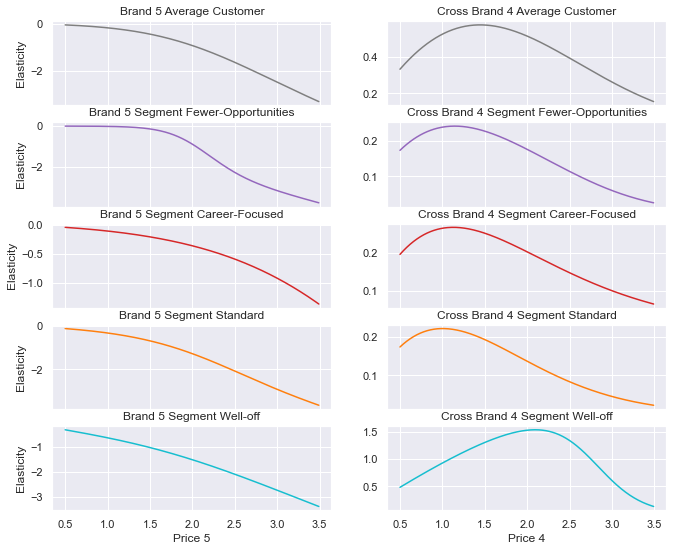

In [101]:
fig1, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 2, figsize = (11, 9), sharex = True)
ax1[0].plot(price_range, own_price_elasticity_brand_5, 'tab:grey')
ax1[0].set_title('Brand 5 Average Customer')
ax1[0].set_ylabel('Elasticity')
ax1[1].plot(price_range, brand5_cross_brand4_price_elasticity, 'tab:grey')
ax1[1].set_title('Cross Brand 4 Average Customer')


ax2[0].plot(price_range, own_price_elasticity_brand_5_s0, 'tab:purple')
ax2[0].set_title('Brand 5 Segment Fewer-Opportunities')
ax2[0].set_ylabel('Elasticity')
ax2[1].plot(price_range, brand5_cross_brand4_price_elasticity_s0, 'tab:purple')
ax2[1].set_title('Cross Brand 4 Segment Fewer-Opportunities')

ax3[0].plot(price_range, own_price_elasticity_brand_5_s1, 'tab:red')
ax3[0].set_title('Brand 5 Segment Career-Focused')
ax3[0].set_ylabel('Elasticity')
ax3[1].plot(price_range, brand5_cross_brand4_price_elasticity_s1, 'tab:red')
ax3[1].set_title('Cross Brand 4 Segment Career-Focused')

ax4[0].plot(price_range, own_price_elasticity_brand_5_s2, 'tab:orange')
ax4[0].set_title('Brand 5 Segment Standard')
ax4[0].set_ylabel('Elasticity')
ax4[1].plot(price_range, brand5_cross_brand4_price_elasticity_s2, 'tab:orange')
ax4[1].set_title('Cross Brand 4 Segment Standard')

ax5[0].plot(price_range, own_price_elasticity_brand_5_s3, 'tab:cyan')
ax5[0].set_title('Brand 5 Segment Well-off')
ax5[0].set_xlabel('Price 5')
ax5[0].set_ylabel('Elasticity')
ax5[1].plot(price_range, brand5_cross_brand4_price_elasticity_s3, 'tab:cyan')
ax5[1].set_title('Cross Brand 4 Segment Well-off')
ax5[1].set_xlabel('Price 4')

### Price Elasticity of Purchase Quantity

In [102]:
# We would like to determine price elasticity of purchase quantity, also known as price elasticity of demand.
df_purchase_quantity = df_pa[df_pa['Incidence'] == 1]
df_purchase_quantity.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Age,Education,Income,Occupation,Settlement size,Segment,Segment_0,Segment_1,Segment_2,Segment_3
6,200000001,28,1,2,2,0,0,1.50,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
11,200000001,58,1,5,1,0,0,1.39,1.90,1.91,...,47,1,110866,1,0,0,1,0,0,0
19,200000001,110,1,1,2,0,0,1.47,1.90,1.99,...,47,1,110866,1,0,0,1,0,0,0
24,200000001,142,1,4,1,0,0,1.21,1.35,1.99,...,47,1,110866,1,0,0,1,0,0,0
29,200000001,183,1,2,3,0,0,1.46,1.88,1.97,...,47,1,110866,1,0,0,1,0,0,0


In [103]:
# Creating brand dummies, for each of the five brands.
df_purchase_quantity = pd.get_dummies(df_purchase_quantity, columns = ['Brand'], prefix = 'Brand', prefix_sep = '_')
# The descriptive analysis of the purchase quantitiy data frame, shows that quantity ranges from 1 to 15 
# and has an average value of 2.8, which means that more often our customers buy more than 1 chocolate candy bar.
df_purchase_quantity.describe()

,ID,Day,Incidence,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,Price_4,...,Segment,Segment_0,Segment_1,Segment_2,Segment_3,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5
count,1.463800e+04,14638.000000,14638.0,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,...,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000,14638.000000
mean,2.000003e+08,359.607597,1.0,2.774559,1.535251,0.406955,1.384559,1.764717,2.006694,2.159658,...,1.341235,0.294303,0.300314,0.175229,0.230154,0.092226,0.310288,0.057453,0.199959,0.340074
std,1.423786e+02,205.346253,0.0,1.796736,2.060858,0.491283,0.090944,0.181667,0.046200,0.093253,...,1.128625,0.455744,0.458410,0.380176,0.420946,0.289354,0.462627,0.232714,0.399983,0.473750
min,2.000000e+08,1.000000,1.0,1.000000,0.000000,0.000000,1.100000,1.260000,1.870000,1.760000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000001e+08,175.000000,1.0,2.000000,0.000000,0.000000,1.340000,1.570000,1.970000,2.120000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000003e+08,355.000000,1.0,2.000000,0.000000,0.000000,1.390000,1.880000,2.010000,2.180000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000004e+08,532.000000,1.0,3.000000,4.000000,1.000000,1.470000,1.890000,2.060000,2.240000,...,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,2.000005e+08,727.000000,1.0,15.000000,5.000000,1.000000,1.590000,1.900000,2.140000,2.260000,...,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [104]:
df_purchase_quantity.columns.values

array(['ID', 'Day', 'Incidence', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3',
       'Promotion_4', 'Promotion_5', 'Sex', 'Marital status', 'Age',
       'Education', 'Income', 'Occupation', 'Settlement size', 'Segment',
       'Segment_0', 'Segment_1', 'Segment_2', 'Segment_3', 'Brand_1',
       'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5'], dtype=object)

In [105]:
#Finding the price of the product that is chosen at this incidence
df_purchase_quantity['Price_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Price_1'] +
                                           df_purchase_quantity['Brand_2'] * df_purchase_quantity['Price_2'] +
                                           df_purchase_quantity['Brand_3'] * df_purchase_quantity['Price_3'] +
                                           df_purchase_quantity['Brand_4'] * df_purchase_quantity['Price_4'] +
                                           df_purchase_quantity['Brand_5'] * df_purchase_quantity['Price_5'] )

In [106]:
#Finding the price of the product that is chosen at this incidence
df_purchase_quantity['Promotion_Incidence'] = (df_purchase_quantity['Brand_1'] * df_purchase_quantity['Promotion_1'] +
                                               df_purchase_quantity['Brand_2'] * df_purchase_quantity['Promotion_2'] +
                                               df_purchase_quantity['Brand_3'] * df_purchase_quantity['Promotion_3'] +
                                               df_purchase_quantity['Brand_4'] * df_purchase_quantity['Promotion_4'] +
                                               df_purchase_quantity['Brand_5'] * df_purchase_quantity['Promotion_5'] )

## Model Estimation. Linear Regression

In [107]:
X = df_purchase_quantity[['Price_Incidence', 'Promotion_Incidence']]
pd.options.display.max_rows = 100
X

,Price_Incidence,Promotion_Incidence
6,1.90,0
11,2.62,1
19,1.47,0
24,2.16,0
29,1.88,0
...,...,...
58621,1.89,0
58648,1.35,1
58674,1.85,1
58687,1.51,0


In [108]:
Y = df_purchase_quantity['Quantity']
Y.head()

6     2
11    1
19    2
24    1
29    3
Name: Quantity, dtype: int64

In [109]:
# Linear Regression Model
model_quantity = LinearRegression()
model_quantity.fit(X, Y)

LinearRegression()

In [110]:
# Linear Regression Model. The coefficients for price and promotion are both negative. 
# It appears that promotion reflects negatively on the purchase quantity of the average client, which is unexpected.
model_quantity.coef_

array([-0.8173651 , -0.10504673])

### Price Elasticity with Promotion

In [111]:
# Examining the price elasticity of purchase quantity with active promotional activities for each price point.
df_price_elasticity_quantity = pd.DataFrame(index = np.arange(price_range.size))
df_price_elasticity_quantity['Price_Incidence'] = price_range
df_price_elasticity_quantity['Promotion_Incidence'] = 1

In [112]:
beta_quantity = model_quantity.coef_[0]
beta_quantity

-0.8173651016684959

In [113]:
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)

In [114]:
# We calculate the price elasticity with our new formula. 
# It is the beta coefficient for price multiplied by price and divided by the purchase quantity.
price_elasticity_quantity_promotion_yes = beta_quantity * price_range / predict_quantity

In [115]:
df_price_elasticities['PE_Quantity_Promotion_1'] = price_elasticity_quantity_promotion_yes
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056,0.332011,-0.001042,0.172739,-0.039243,0.196459,-0.115831,0.174113,-0.298429,0.482873,-0.102157
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617,0.337287,-0.001104,0.175009,-0.040245,0.198955,-0.118870,0.176169,-0.304488,0.492185,-0.104413
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207,0.342507,-0.001170,0.177235,-0.041256,0.201398,-0.121944,0.178173,-0.310556,0.501481,-0.106679
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827,0.347668,-0.001239,0.179417,-0.042278,0.203790,-0.125053,0.180127,-0.316635,0.510762,-0.108954
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477,0.352773,-0.001311,0.181555,-0.043309,0.206130,-0.128197,0.182030,-0.322724,0.520026,-0.111238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012224,-12.415168,-5.724497,-5.052504,-4.161902,-4.861432,-4.983042,-3.231573,0.162234,-3.746045,0.028578,-1.319097,0.068696,-3.592457,0.024052,-3.331946,0.153524,-1.774292
296,3.46,-8.037473,-12.451737,-5.744742,-5.069359,-4.177231,-4.879634,-4.999947,-3.247767,0.160333,-3.757487,0.028048,-1.329301,0.068082,-3.606361,0.023696,-3.345274,0.148213,-1.788634
297,3.47,-8.062687,-12.488289,-5.764950,-5.086196,-4.192542,-4.897804,-5.016833,-3.263929,0.158448,-3.768908,0.027525,-1.339561,0.067472,-3.620221,0.023344,-3.358601,0.143065,-1.803124
298,3.48,-8.087867,-12.524825,-5.785122,-5.103014,-4.207836,-4.915945,-5.033699,-3.280058,0.156576,-3.780310,0.027010,-1.349878,0.066867,-3.634038,0.022997,-3.371924,0.138076,-1.817766


Text(0.5, 1.0, 'Price Elasticity of Purchase Quantity with Promotion')

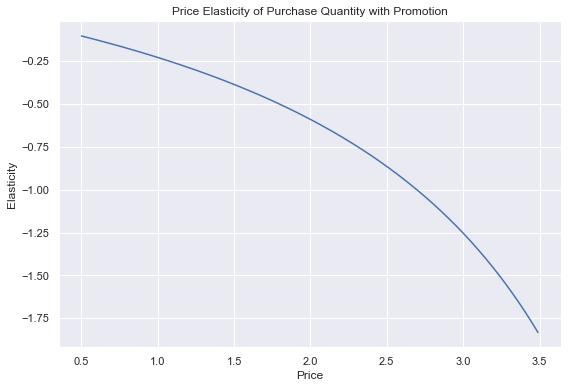

In [116]:
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')

### Price Elasticity without Promotion

In [117]:
# Overwriting promotion incidence in order to use the same df. 
# Here we assume there are no promotinal activities active for the entire price range.
df_price_elasticity_quantity['Promotion_Incidence'] = 0
# Finding the new predicted quantities.
predict_quantity = model_quantity.predict(df_price_elasticity_quantity)
# Calculating the new price elasticities.
price_elasticity_quantity_promotion_no = beta_quantity * price_range / predict_quantity
# Adding the results to the master data frame.
df_price_elasticities['PE_Quantity_Promotion_0'] = price_elasticity_quantity_promotion_no
df_price_elasticities

,Price_Point,Mean_PE,PE_Segment_0,PE_Segment_1,PE_Segment_2,PE_Segment_3,Elasticity_Promotion_1,Elasticity_Promotion_0,Brand_5,Brand_5_Cross_Brand_4,Brand 5 S0,Brand_5_Cross_Brand_4_S0,Brand 5 S1,Brand_5_Cross_Brand_4_S1,Brand 5 S2,Brand_5_Cross_Brand_4_S2,Brand 5 S3,Brand_5_Cross_Brand_4_S3,PE_Quantity_Promotion_1,PE_Quantity_Promotion_0
0,0.50,-0.096384,-0.032273,-0.119044,-0.211356,-0.165216,-0.125737,-0.195643,-0.049056,0.332011,-0.001042,0.172739,-0.039243,0.196459,-0.115831,0.174113,-0.298429,0.482873,-0.102157,-0.099543
1,0.51,-0.100451,-0.034104,-0.123239,-0.217931,-0.170134,-0.129853,-0.201765,-0.050617,0.337287,-0.001104,0.175009,-0.040245,0.198955,-0.118870,0.176169,-0.304488,0.492185,-0.104413,-0.101736
2,0.52,-0.104645,-0.036024,-0.127529,-0.224614,-0.175126,-0.134048,-0.207988,-0.052207,0.342507,-0.001170,0.177235,-0.041256,0.201398,-0.121944,0.178173,-0.310556,0.501481,-0.106679,-0.103939
3,0.53,-0.108970,-0.038037,-0.131915,-0.231406,-0.180192,-0.138323,-0.214315,-0.053827,0.347668,-0.001239,0.179417,-0.042278,0.203790,-0.125053,0.180127,-0.316635,0.510762,-0.108954,-0.106150
4,0.54,-0.113427,-0.040147,-0.136398,-0.238307,-0.185332,-0.142679,-0.220746,-0.055477,0.352773,-0.001311,0.181555,-0.043309,0.206130,-0.128197,0.182030,-0.322724,0.520026,-0.111238,-0.108369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,3.45,-8.012224,-12.415168,-5.724497,-5.052504,-4.161902,-4.861432,-4.983042,-3.231573,0.162234,-3.746045,0.028578,-1.319097,0.068696,-3.592457,0.024052,-3.331946,0.153524,-1.774292,-1.664290
296,3.46,-8.037473,-12.451737,-5.744742,-5.069359,-4.177231,-4.879634,-4.999947,-3.247767,0.160333,-3.757487,0.028048,-1.329301,0.068082,-3.606361,0.023696,-3.345274,0.148213,-1.788634,-1.677205
297,3.47,-8.062687,-12.488289,-5.764950,-5.086196,-4.192542,-4.897804,-5.016833,-3.263929,0.158448,-3.768908,0.027525,-1.339561,0.067472,-3.620221,0.023344,-3.358601,0.143065,-1.803124,-1.690246
298,3.48,-8.087867,-12.524825,-5.785122,-5.103014,-4.207836,-4.915945,-5.033699,-3.280058,0.156576,-3.780310,0.027010,-1.349878,0.066867,-3.634038,0.022997,-3.371924,0.138076,-1.817766,-1.703414


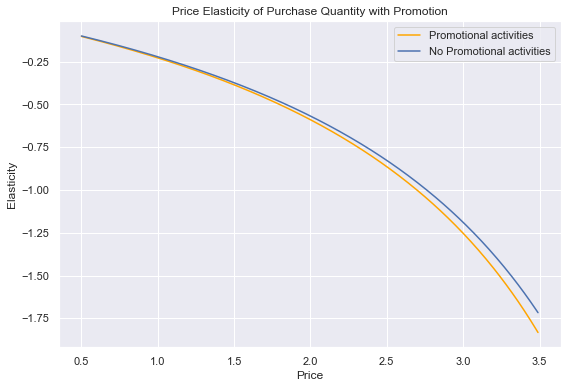

In [118]:
# We observe that the two elasticities are very close together for almost the entire price range.
# It appears that promotion does not appear to be a significant factor in the customers' decission what quantity of chocolate candy bars to purchase.
plt.figure(figsize = (9, 6))
plt.plot(price_range, price_elasticity_quantity_promotion_yes, color = 'orange')
plt.plot(price_range, price_elasticity_quantity_promotion_no)
plt.xlabel('Price')
plt.ylabel('Elasticity')
plt.title('Price Elasticity of Purchase Quantity with Promotion')
plt.legend(['Promotional activities','No Promotional activities'])